In [6]:
import pandas as pd
import numpy as np
from keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns

In [8]:
df = pd.read_csv("weatherHistory.csv")

In [10]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [12]:
df = df.dropna(axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95936 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            95936 non-null  object 
 1   Summary                   95936 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           95936 non-null  float64
 4   Apparent Temperature (C)  95936 non-null  float64
 5   Humidity                  95936 non-null  float64
 6   Wind Speed (km/h)         95936 non-null  float64
 7   Wind Bearing (degrees)    95936 non-null  float64
 8   Visibility (km)           95936 non-null  float64
 9   Loud Cover                95936 non-null  float64
 10  Pressure (millibars)      95936 non-null  float64
 11  Daily Summary             95936 non-null  object 
dtypes: float64(8), object(4)
memory usage: 9.5+ MB


In [13]:
df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [15]:
df_1 = df.iloc[:,3:11]
normalized = preprocessing.normalize(df_1)
normalized_df = pd.DataFrame(normalized,columns=['Temperature (C)','Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)','Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover','Pressure (millibars)'])
normalized_df.head(20)

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
0,0.009056,0.007064,0.000851,0.013499,0.239965,0.015131,0.0,0.970501
1,0.008923,0.006894,0.000820,0.013606,0.247039,0.015095,0.0,0.968726
2,0.009048,0.009048,0.000859,0.003790,0.196831,0.014431,0.0,0.980240
3,0.007882,0.005652,0.000789,0.013411,0.255784,0.015049,0.0,0.966475
4,0.008345,0.006650,0.000791,0.010526,0.246849,0.015084,0.0,0.968820
5,0.008790,0.006778,0.000810,0.013305,0.245913,0.014256,0.0,0.969032
6,0.007370,0.005262,0.000905,0.011783,0.246818,0.009513,0.0,0.968901
7,0.008356,0.006218,0.000848,0.013481,0.247677,0.009509,0.0,0.968646
8,0.010306,0.010306,0.000781,0.010779,0.246657,0.009506,0.0,0.968886
9,0.013053,0.013053,0.000682,0.011872,0.264433,0.009461,0.0,0.964108


<AxesSubplot:>

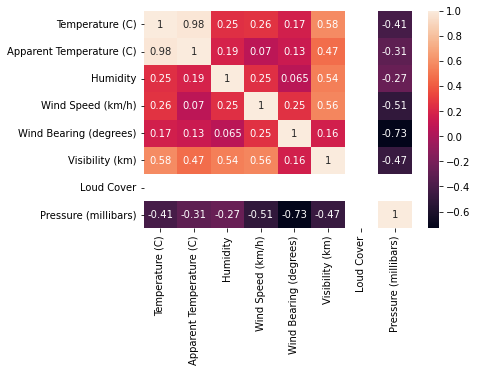

In [16]:
nor_corr = normalized_df.corr()
sns.heatmap(nor_corr,annot=True)

In [17]:
normalized_df = normalized_df.drop(['Loud Cover'],axis=1)

In [18]:
x = normalized_df.iloc[:,1:5]
y = normalized_df.iloc[:,5]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=10)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(67155, 4) (67155,) (28781, 4) (28781,)


In [19]:
import keras
import tensorflow as tf
model = Sequential()
model.add(Dense(32,input_dim=4,activation='softplus'))
model.add(Dense(16,activation='softplus'))
model.add(Dropout(0.2))
model.add(Dense(8,activation='softplus'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='linear'))

In [20]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [21]:
model.fit(x_train,y_train,epochs=10,batch_size=10,verbose=1)

Epoch 1/10
6716/6716 [==============================] - 6s 636us/step - loss: 0.1690 - accuracy: 0.0030
Epoch 2/10
6716/6716 [==============================] - 4s 629us/step - loss: 0.1682 - accuracy: 0.0030
Epoch 3/10
6716/6716 [==============================] - 4s 643us/step - loss: 0.1683 - accuracy: 0.0030
Epoch 4/10
6716/6716 [==============================] - 4s 628us/step - loss: 0.1683 - accuracy: 0.0030
Epoch 5/10
6716/6716 [==============================] - 4s 619us/step - loss: 0.1683 - accuracy: 0.0030
Epoch 6/10
6716/6716 [==============================] - 4s 669us/step - loss: 0.1683 - accuracy: 0.0030
Epoch 7/10
6716/6716 [==============================] - 4s 650us/step - loss: 0.1683 - accuracy: 0.0030
Epoch 8/10
6716/6716 [==============================] - 4s 635us/step - loss: 0.1683 - accuracy: 0.0030
Epoch 9/10
6716/6716 [==============================] - 4s 668us/step - loss: 0.1683 - accuracy: 0.0030
Epoch 10/10
6716/6716 [==============================] - 4s 635u

In [22]:
loss,accuracy=model.evaluate(x_test,y_test,verbose=1)
print('Model Loss: %.2f, Accuracy:%.2f' %((loss*100),(accuracy*100)))

900/900 [==============================] - 1s 490us/step - loss: 0.1672 - accuracy: 0.0031
Model Loss: 16.72, Accuracy:0.31
